In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperformance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

studentsperformance_df_orignal = studentsperformance_df.copy()

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## Problem 1

In [3]:
studentsperformance_df_orignal.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
studentsperformance_df_orignal.groupby('gender').mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


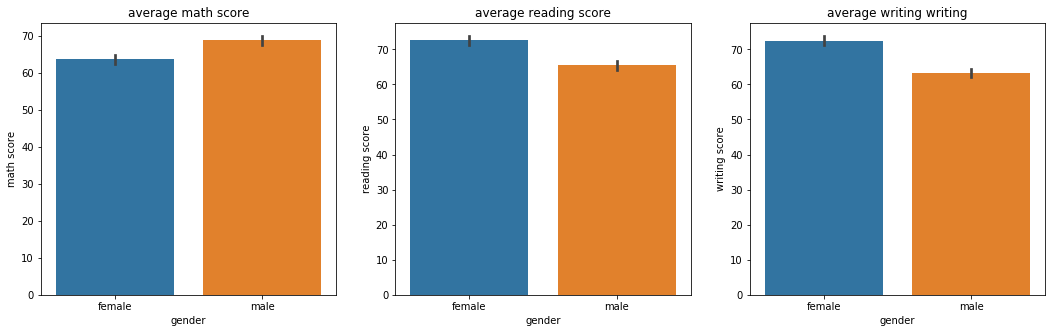

The t-test results for math scores by gender are Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
The t-test results for reading scores by gender are Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
The t-test results for writing scores by gender are Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


In [15]:

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df_orignal["gender"], studentsperformance_df_orignal["math score"])
plt.title("average math score")

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df_orignal["gender"], studentsperformance_df_orignal["reading score"])
plt.title("average reading score")

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df_orignal["gender"], studentsperformance_df_orignal["writing score"])
plt.title("average writing writing")

plt.show()

print('The t-test results for math scores by gender are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["gender"] == 'female']['math score'],studentsperformance_df_orignal[studentsperformance_df_orignal["gender"] == 'male']['math score'])))
print('The t-test results for reading scores by gender are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["gender"] == 'female']['reading score'],studentsperformance_df_orignal[studentsperformance_df_orignal["gender"] == 'male']['reading score'])))
print('The t-test results for writing scores by gender are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["gender"] == 'female']['writing score'],studentsperformance_df_orignal[studentsperformance_df_orignal["gender"] == 'male']['writing score'])))

According to the t-tests, each gender's scoring distribution is significantly different.

In [5]:
studentsperformance_df_orignal.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


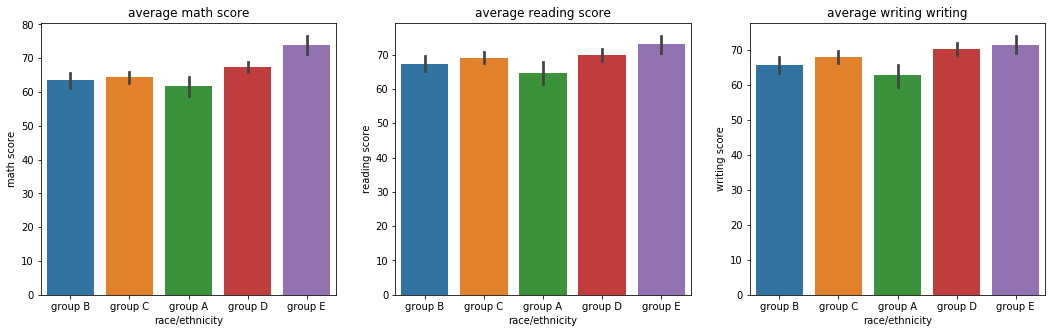

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In [17]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df_orignal["race/ethnicity"], studentsperformance_df_orignal["math score"])
plt.title("average math score")

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df_orignal["race/ethnicity"], studentsperformance_df_orignal["reading score"])
plt.title("average reading score")

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df_orignal["race/ethnicity"], studentsperformance_df_orignal["writing score"])
plt.title("average writing writing")

plt.show()

race_eth = studentsperformance_df_orignal["race/ethnicity"].unique()
grouped_df = studentsperformance_df_orignal.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race_eth)):
        for j in range(i+1, len(race_eth)):
            print("t-test between groups {0} and {1}:".format(race_eth[i], race_eth[j]))
            print(stats.ttest_ind(
                studentsperformance_df_orignal[studentsperformance_df_orignal["race/ethnicity"]==race_eth[i]][var], 
                studentsperformance_df_orignal[studentsperformance_df_orignal["race/ethnicity"]==race_eth[j]][var]
            ))

About a third of the categories are not significantly different.

In [6]:
studentsperformance_df_orignal.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


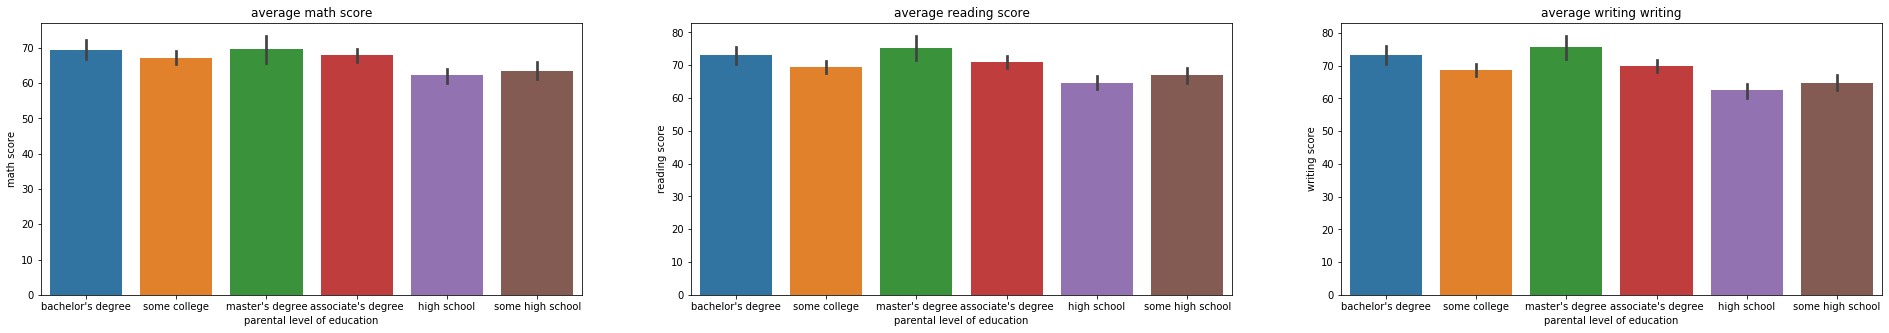

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

In [21]:
plt.figure(figsize=(33,5))

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df_orignal["parental level of education"], studentsperformance_df_orignal["math score"])
plt.title("average math score")

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df_orignal["parental level of education"], studentsperformance_df_orignal["reading score"])
plt.title("average reading score")

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df_orignal["parental level of education"], studentsperformance_df_orignal["writing score"])
plt.title("average writing writing")

plt.show()

ed_lvl = studentsperformance_df_orignal["parental level of education"].unique()
grouped_df = studentsperformance_df_orignal.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ed_lvl)):
        for j in range(i+1, len(ed_lvl)):
            print("t-test between groups {0} and {1}:".format(ed_lvl[i], ed_lvl[j]))
            print(stats.ttest_ind(
                studentsperformance_df_orignal[studentsperformance_df_orignal["parental level of education"]==ed_lvl[i]][var], 
                studentsperformance_df_orignal[studentsperformance_df_orignal["parental level of education"]==ed_lvl[j]][var]
            ))

More than half of the groups are significantly different.

## Problem 2

In [22]:
studentsperformance_df_orignal.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


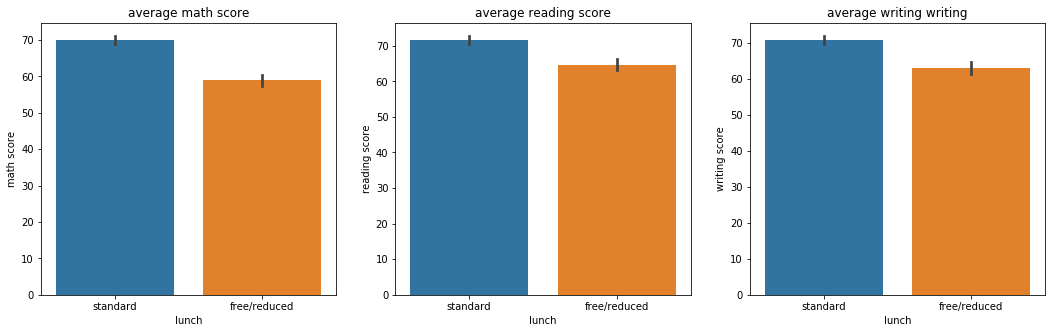

The t-test results for math scores by lunch are Ttest_indResult(statistic=-11.837180472914612, pvalue=2.4131955993137074e-30)
The t-test results for reading scores by lunch are Ttest_indResult(statistic=-7.451056467473455, pvalue=2.0027966545279011e-13)
The t-test results for writing scores by lunch are Ttest_indResult(statistic=-8.009784197834758, pvalue=3.1861895831664765e-15)


In [23]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df_orignal["lunch"], studentsperformance_df_orignal["math score"])
plt.title("average math score")

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df_orignal["lunch"], studentsperformance_df_orignal["reading score"])
plt.title("average reading score")

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df_orignal["lunch"], studentsperformance_df_orignal["writing score"])
plt.title("average writing writing")

plt.show()

print('The t-test results for math scores by lunch are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["lunch"] == 'free/reduced']['math score'],studentsperformance_df_orignal[studentsperformance_df_orignal["lunch"] == 'standard']['math score'])))
print('The t-test results for reading scores by lunch are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["lunch"] == 'free/reduced']['reading score'],studentsperformance_df_orignal[studentsperformance_df_orignal["lunch"] == 'standard']['reading score'])))
print('The t-test results for writing scores by lunch are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["lunch"] == 'free/reduced']['writing score'],studentsperformance_df_orignal[studentsperformance_df_orignal["lunch"] == 'standard']['writing score'])))

From the t-test results, it is clear that the distributions of standard lunches to free/reduced is significant. 

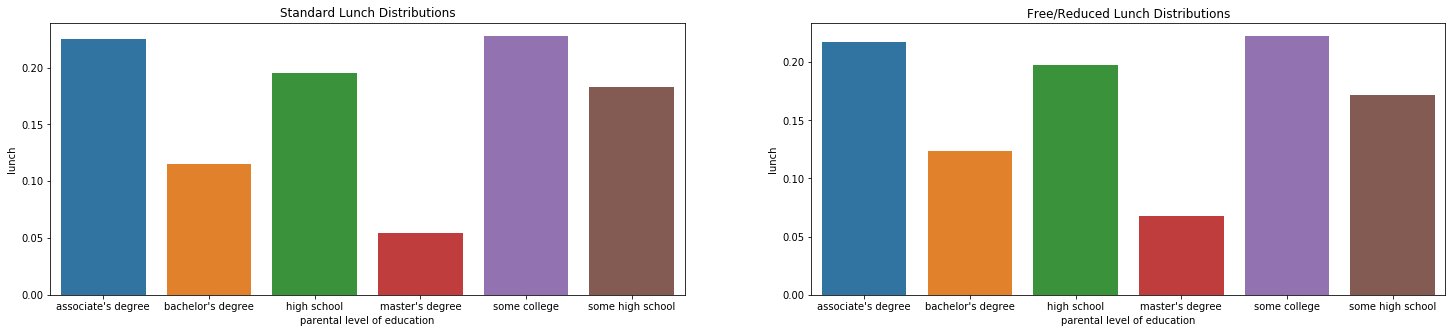

In [37]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
sns.barplot(studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'standard'].groupby('parental level of education').count()['lunch'].index, studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'standard'].groupby('parental level of education').count()['lunch']/studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'standard'].groupby('parental level of education').count()['lunch'].sum())
plt.title("Standard Lunch Distributions")

plt.subplot(1,2,2)
sns.barplot(studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'free/reduced'].groupby('parental level of education').count()['lunch'].index, studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'free/reduced'].groupby('parental level of education').count()['lunch']/studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'free/reduced'].groupby('parental level of education').count()['lunch'].sum())
plt.title("Free/Reduced Lunch Distributions")


plt.show()

In [38]:
studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'standard'].groupby('parental level of education').count()['lunch']/studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'standard'].groupby('parental level of education').count()['lunch'].sum()

parental level of education
associate's degree    0.224806
bachelor's degree     0.114729
high school           0.195349
master's degree       0.054264
some college          0.227907
some high school      0.182946
Name: lunch, dtype: float64

In [39]:
studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'free/reduced'].groupby('parental level of education').count()['lunch']/studentsperformance_df_orignal[studentsperformance_df_orignal['lunch'] == 'free/reduced'].groupby('parental level of education').count()['lunch'].sum()

parental level of education
associate's degree    0.216901
bachelor's degree     0.123944
high school           0.197183
master's degree       0.067606
some college          0.222535
some high school      0.171831
Name: lunch, dtype: float64

My original explanation would be that there are more students who have parents with a higher level of education in the standard category as opposed to the free/reduced one. However, from the distributions displayed below, that is not the case. The distributions are similar and, in fact, the free/reduced lunch students have a slightly higher chance of having a parent with a masters or bachelors degree. The only other explanation would be that students who come from homes that can afford the standard lunch are better prepared than those who's family can't afford it.

## Problem 3

In [42]:
studentsperformance_df_orignal.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


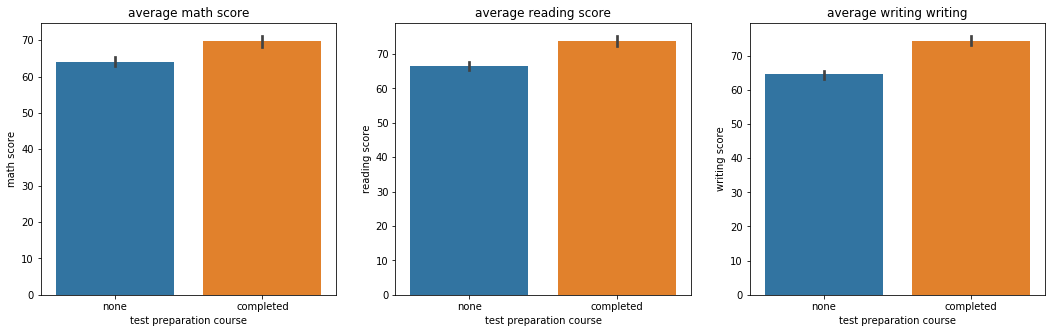

The t-test results for math scores by test preparation course are Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)
The t-test results for reading scores by test preparation course are Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)
The t-test results for writing scores by test preparation course are Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)


In [44]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df_orignal["test preparation course"], studentsperformance_df_orignal["math score"])
plt.title("average math score")

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df_orignal["test preparation course"], studentsperformance_df_orignal["reading score"])
plt.title("average reading score")

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df_orignal["test preparation course"], studentsperformance_df_orignal["writing score"])
plt.title("average writing writing")

plt.show()

print('The t-test results for math scores by test preparation course are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["test preparation course"] == 'completed']['math score'],studentsperformance_df_orignal[studentsperformance_df_orignal["test preparation course"] == 'none']['math score'])))
print('The t-test results for reading scores by test preparation course are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["test preparation course"] == 'completed']['reading score'],studentsperformance_df_orignal[studentsperformance_df_orignal["test preparation course"] == 'none']['reading score'])))
print('The t-test results for writing scores by test preparation course are {}'.format(stats.ttest_ind(studentsperformance_df_orignal[studentsperformance_df_orignal["test preparation course"] == 'completed']['writing score'],studentsperformance_df_orignal[studentsperformance_df_orignal["test preparation course"] == 'none']['writing score'])))

From the mean scores and the t-tests, it is clear that students who complete the test preparation course do better than those who do not.

## Problem 4

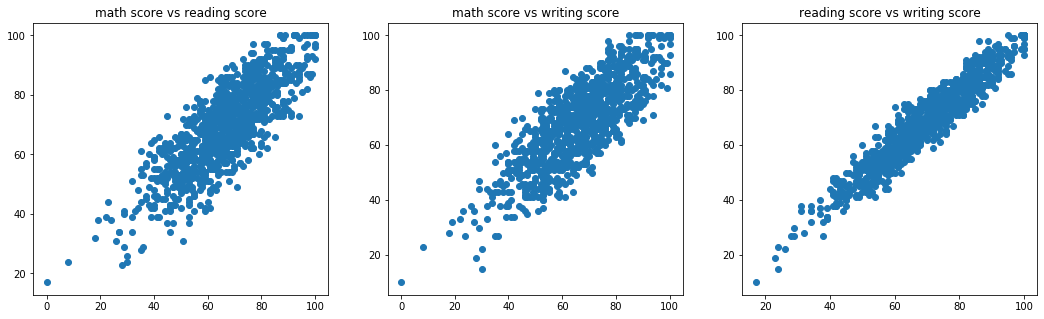

In [45]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(studentsperformance_df_orignal["math score"], studentsperformance_df_orignal["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(studentsperformance_df_orignal["math score"], studentsperformance_df_orignal["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,3,3)
plt.scatter(studentsperformance_df_orignal["reading score"], studentsperformance_df_orignal["writing score"])
plt.title("reading score vs writing score")

plt.show()

In [46]:
studentsperformance_df_orignal.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


While each test correlates fairly high with each other, the reading and writing test are the most correlated with a factor of 0.955.